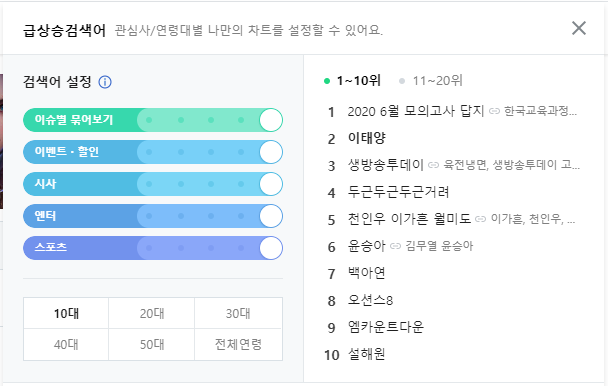

In [1]:
# 크롤링에 사용할 라이브러리를 설치하고 import 한다.
# 클롤링할 사이트에 접속해서 html 문서를 읽어오는 라이브러리
# !pip install requests
# requests 모듈을 사용해 읽어온 html 문서를 파싱하는 라이브러리
# !pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup

from IPython.display import Image
Image("./images/naver.PNG", width = "700", height = "1000")

In [2]:
'''
# 네이버 실시간 검색어 크롤링
request = requests.get("https://www.naver.com/")
print(request) # <Response [200]> => 타겟 사이트에 정상적으로 접속했다.
# 타겟 사이트에서 읽어온 내용 중 html 태그(text)만 읽어온다.
html = request.text
print(html)
'''
pass

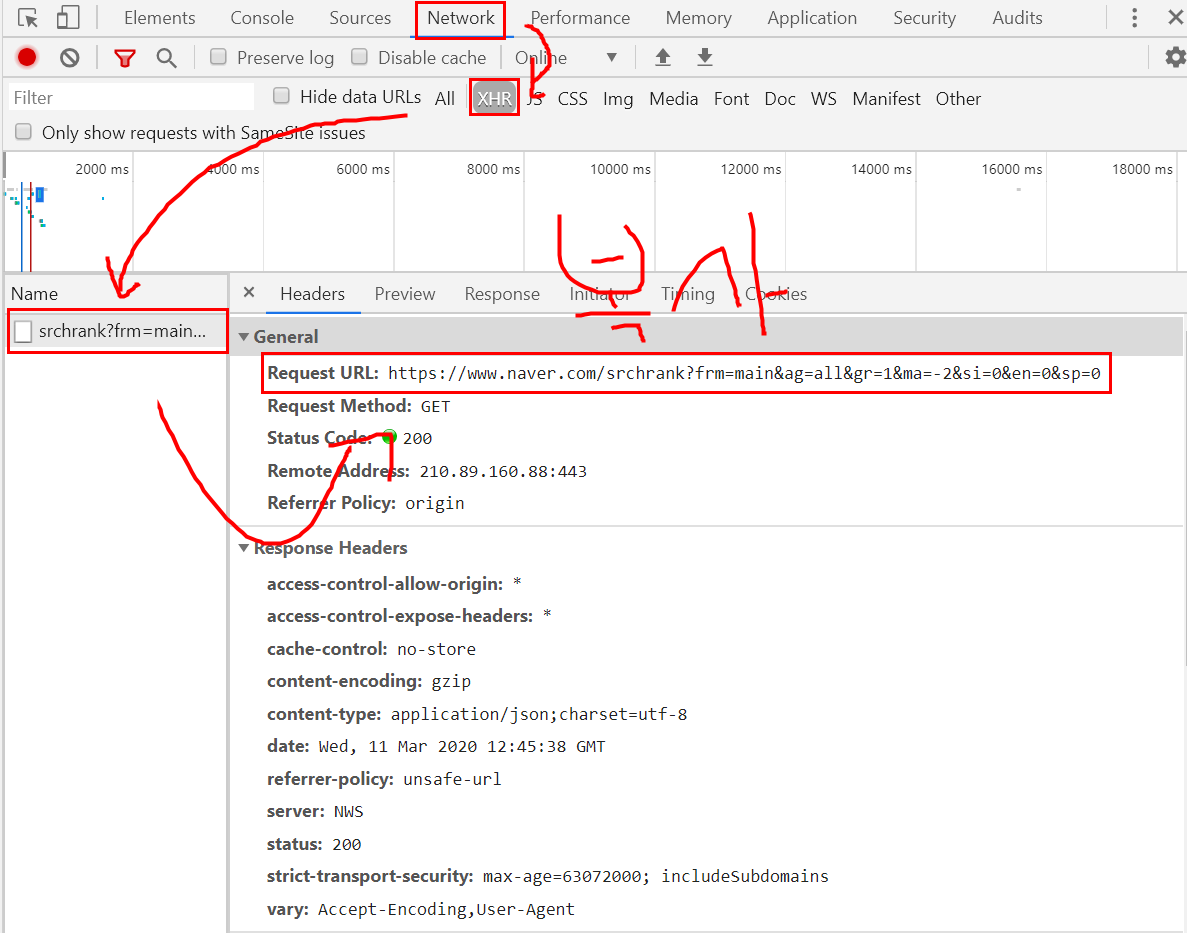

In [3]:
# 네이버 실시간 검색어 크롤링
# 2020년 3월 네이버 실시간 검색어를 크롤링하는 방법이 변경되었다.
# 실시간 검색어가 웹 페이지에 포함되어 있지 않고 ajax를 이용해 받아오는 방식을 사용한다.
# requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 json으로 받는다.
request = requests.get("https://apis.naver.com/mobile_main/srchrank/srchrank?frm=main&ag=all&gr=0&ma=-2&si=-2&en=-2&sp=-2")
# 개발자 모드(크롬에서 F12)에서 아래 그림처럼 Network => XHR(ajax) => srchrank 클릭 => URL 복사
Image("./images/naver02.png", width = "1000", height = "1000")

In [4]:
# 실시간 검색어를 저장한다.
word = request.text
print(type(word))
print(word)

<class 'str'>
{"ts":"2020-06-18T21:16:00+0900","sm":"agallgr0mamsimenmspm","rop":[{"ag":"all"},{"gr":"00"},{"ma":"-2"},{"si":"-2"},{"en":"-2"},{"sp":"-2"}],"data":[{"rank":1,"keyword":"현대엘리베이터","keyword_synonyms":[]},{"rank":2,"keyword":"이투스","keyword_synonyms":[]},{"rank":3,"keyword":"팬데믹 뜻","keyword_synonyms":[]},{"rank":4,"keyword":"2020 6월 모의고사 답지","keyword_synonyms":[]},{"rank":5,"keyword":"뉴칼레도니아","keyword_synonyms":[]},{"rank":6,"keyword":"2020 고1 6월 모의고사","keyword_synonyms":[]},{"rank":7,"keyword":"메디톡신","keyword_synonyms":[]},{"rank":8,"keyword":"덱사메타손 관련주","keyword_synonyms":[]},{"rank":9,"keyword":"2021 6월 모의고사","keyword_synonyms":[]},{"rank":10,"keyword":"미래수업","keyword_synonyms":[]},{"rank":11,"keyword":"2019 6월 고1 모의고사","keyword_synonyms":[]},{"rank":12,"keyword":"홍사덕","keyword_synonyms":[]},{"rank":13,"keyword":"스톤에이지 월드","keyword_synonyms":[]},{"rank":14,"keyword":"노수광","keyword_synonyms":[]},{"rank":15,"keyword":"2020 6월 모의고사","keyword_synonyms":[]},{"rank":16,"keyword

In [5]:
# json 형태의 실시간 검색어를 딕셔너리로 변환시키는 json 모듈을 import 한다.
import json

In [6]:
# json 모듈의 loads() 메소드를 사용해서 json 데이터를 딕셔너리 타입으로 변환한다.
word_json = json.loads(word)
print(type(word_json))
print(word_json)

<class 'dict'>
{'ts': '2020-06-18T21:16:00+0900', 'sm': 'agallgr0mamsimenmspm', 'rop': [{'ag': 'all'}, {'gr': '00'}, {'ma': '-2'}, {'si': '-2'}, {'en': '-2'}, {'sp': '-2'}], 'data': [{'rank': 1, 'keyword': '현대엘리베이터', 'keyword_synonyms': []}, {'rank': 2, 'keyword': '이투스', 'keyword_synonyms': []}, {'rank': 3, 'keyword': '팬데믹 뜻', 'keyword_synonyms': []}, {'rank': 4, 'keyword': '2020 6월 모의고사 답지', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '뉴칼레도니아', 'keyword_synonyms': []}, {'rank': 6, 'keyword': '2020 고1 6월 모의고사', 'keyword_synonyms': []}, {'rank': 7, 'keyword': '메디톡신', 'keyword_synonyms': []}, {'rank': 8, 'keyword': '덱사메타손 관련주', 'keyword_synonyms': []}, {'rank': 9, 'keyword': '2021 6월 모의고사', 'keyword_synonyms': []}, {'rank': 10, 'keyword': '미래수업', 'keyword_synonyms': []}, {'rank': 11, 'keyword': '2019 6월 고1 모의고사', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '홍사덕', 'keyword_synonyms': []}, {'rank': 13, 'keyword': '스톤에이지 월드', 'keyword_synonyms': []}, {'rank': 14, 'keyword': '노수광', 

In [7]:
# 딕셔너리에서 실시간 검색어만 얻어온다. => 리스트 타입의 데이터가 얻어진다.
# ranks = word_json.get("data")
ranks = word_json["data"]
print(type(ranks))
print(ranks)

<class 'list'>
[{'rank': 1, 'keyword': '현대엘리베이터', 'keyword_synonyms': []}, {'rank': 2, 'keyword': '이투스', 'keyword_synonyms': []}, {'rank': 3, 'keyword': '팬데믹 뜻', 'keyword_synonyms': []}, {'rank': 4, 'keyword': '2020 6월 모의고사 답지', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '뉴칼레도니아', 'keyword_synonyms': []}, {'rank': 6, 'keyword': '2020 고1 6월 모의고사', 'keyword_synonyms': []}, {'rank': 7, 'keyword': '메디톡신', 'keyword_synonyms': []}, {'rank': 8, 'keyword': '덱사메타손 관련주', 'keyword_synonyms': []}, {'rank': 9, 'keyword': '2021 6월 모의고사', 'keyword_synonyms': []}, {'rank': 10, 'keyword': '미래수업', 'keyword_synonyms': []}, {'rank': 11, 'keyword': '2019 6월 고1 모의고사', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '홍사덕', 'keyword_synonyms': []}, {'rank': 13, 'keyword': '스톤에이지 월드', 'keyword_synonyms': []}, {'rank': 14, 'keyword': '노수광', 'keyword_synonyms': []}, {'rank': 15, 'keyword': '2020 6월 모의고사', 'keyword_synonyms': []}, {'rank': 16, 'keyword': '2020년 6월 모의고사 고1 등급컷', 'keyword_synonyms': []}, {'ra

In [11]:
# 실시간 검색어가 저장된 리스트에는 검색어 순위별로 각각 딕셔너리 타입으로 저장되어 있다.
for rank in ranks:
    print("{:2d} : {}".format(rank["rank"], rank["keyword"]))

 1 : 현대엘리베이터
 2 : 이투스
 3 : 팬데믹 뜻
 4 : 2020 6월 모의고사 답지
 5 : 뉴칼레도니아
 6 : 2020 고1 6월 모의고사
 7 : 메디톡신
 8 : 덱사메타손 관련주
 9 : 2021 6월 모의고사
10 : 미래수업
11 : 2019 6월 고1 모의고사
12 : 홍사덕
13 : 스톤에이지 월드
14 : 노수광
15 : 2020 6월 모의고사
16 : 2020년 6월 모의고사 고1 등급컷
17 : 6월 모의고사
18 : 설해원
19 : 2020 6월 고1 모의고사
20 : 평가원
